# Generate a molecule
This section describes the basics of creating molecule objects and their structures.

In [1]:
import os
import pymol
import xmlrpc.client as xmlrpclib

In [2]:
os.system("pymol -R &")
cmd = xmlrpclib.ServerProxy('http://localhost:9123')

In [3]:
from pymol import cmd
from IPython.display import Image
from PIL             import Image

from porems.store import Store

In [17]:
def img_pymol(mol, pic, label=True):
    # Save gro file
    Store(mol,"_build").gro("temp.gro")
    
    # Load into pymol
    cmd.delete("all")
    cmd.load(link)
    
    # Edit view
    cmd.set_color("deepBlue",[0.00, 0.45, 0.70])
    cmd.color("deepBlue")
    cmd.label("all","name")
    cmd.set("label_color","white","all")
    cmd.set("label_size",20)
    cmd.set("label_font_id",5)
    cmd.set("specular","off")
    cmd.set("surface_quality",4)
    cmd.set("sphere_quality",2)
    cmd.set("ray_shadows","off")
    cmd.set("ray_trace_mode",5)
    cmd.set("ray_opaque_background",0)

    # Generate image
    pic_link = "/tmp/"+pic+".png"
    cmd.png(pic_link,width=400,height=400,dpi=1000,ray=1)
    
    # Load image
    img = Image.open(pic_link)

    # Display image
    display(img)

## Initialize object
An empty Molecule object can be easily created by passing no input. Remember to set a name to the molecule, which is also defined in the molecule config file.

In [19]:
from porems.molecule import Molecule

mol = Molecule()
mol.set_name("benzene")

## Create structure
It is possible to create the structures by passing a coordinate.

In [20]:
mol.add("C", [0, 0, 0])

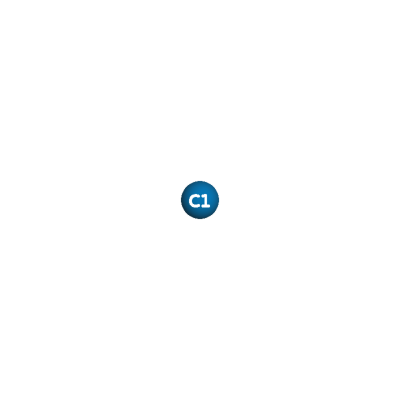

In [20]:
img_pymol(mol, "01")

### Position dependent placing
If the molecule has at least one atom, other atoms can be added depending on that position by passing the reference atom index a distance and an angle. In this case the angle depends on the z plane.

In [21]:
mol.add("C", 0, r=0.1375, theta=60)

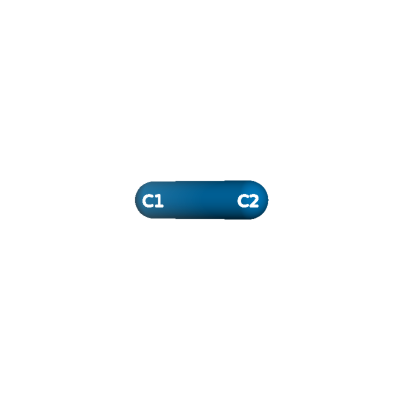

In [21]:
img_pymol(mol, "02")

### Final molecule
Complete the ring structure of the benzene molecule.

In [22]:
mol.add("C", 1, r=0.1375, theta=120)
mol.add("C", 2, r=0.1375, theta=180)
mol.add("C", 3, r=0.1375, theta=240)
mol.add("C", 4, r=0.1375, theta=300)

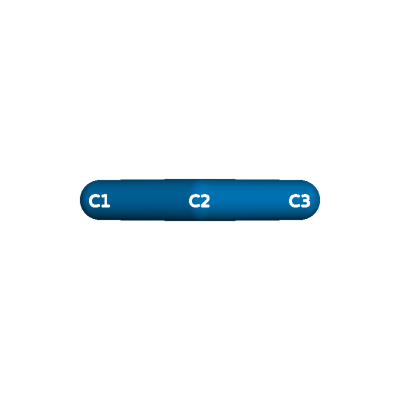

In [22]:
img_pymol(mol, "03")

### Rotate molecule
For viewing purposes the molecule can be rotated. This function might also be needed for specific molecule positioning.
At the end of creating a structure consider resetting the point of origin.

In [23]:
mol.rotate("x", angle=90)
mol.zero()

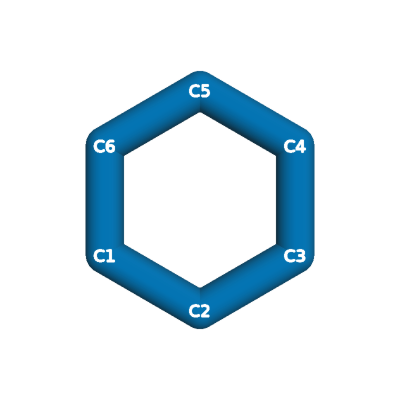

In [23]:
img_pymol(mol, "04")

## Save Structure
Using the write class, the generated structures can be exported into various formats.

In [ ]:
from porems.store import Store

Store(mol).gro()
Store(mol).pdb()
Store(mol).xyz()